<a href="https://colab.research.google.com/github/fatemeh1377emamverdi/Data-Mining-Exercises--Code/blob/main/Tweets_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download en_core_web_sm
!nltk.download('stopwords')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
/bin/bash: -c: line 0: syntax error near unexpected token `'stopwords''
/bin/bash: -c: line 0: `nltk.download('stopwords')'


In [ ]:
#importing useful libraries
import pandas as pd 
import numpy as np
import string 
import matplotlib.pyplot as plt
import seaborn as sns 
from termcolor import colored
import spacy
import re
import sklearn

## reading data

In [ ]:
data_train=pd.read_csv("/content/train.csv")
data_test=pd.read_csv("/content/test.csv")

#;;;;;;;;;;;;;;;;;;;;;;;;;
data_train=data_train[:2000]
data_test=data_test[:500]
#;;;;;;;;;;;;;;;;;;;;;;;;;

print("train shape : {} , test shape : {}".format(colored(data_train.shape,'blue'),colored(data_test.shape,'blue')))

train shape : (2000, 3) , test shape : (500, 2)


In [ ]:
data_train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [ ]:
data_train.sample(10)

,TweetId,Label,TweetText
252,303417576862646272,Sports,"'Like father, like son. Tagenarine Chanderpaul..."
1316,294481557673091073,Politics,'@IndianDiplomacy should be India'
997,305344694643204096,Sports,'RT @Mobss: @GulPanag urgently need blood grp ...
1314,306812550518030337,Sports,'Abbott added to Proteas squad http://t.co/ypu...
763,285614438898348032,Politics,"'""No people in one part of the world could rea..."
1938,300198113061269504,Sports,'#GBFedCup Brit No. 1 Watson beats Babos from ...
1265,304884781081034752,Politics,'HM: National Investigation Agency will invest...
609,34145505621581824,Sports,@benno37 It's amazing isn't it?
454,305251844282793984,Politics,'@akki_ankur i ask him that. Watch the interview'
1236,289547726541180928,Politics,'President Obama Nominates Jacob Lew as Treasu...


In [ ]:
data_train.duplicated().all()# we don't have repetition in our dataset 

False

In [ ]:
data_train.isnull().sum() # we don't have any missing values

TweetId      0
Label        0
TweetText    0
dtype: int64

## data preprocessing 

In [ ]:
X_train,X_test,y_train=data_train.loc[:,["TweetId","TweetText"]],data_test,data_train["Label"]

In [ ]:
#combine X_train and X_test to clean the data once
X=pd.concat([X_train,X_test],ignore_index=True)

In [ ]:
X.TweetText[2]

"'Watch video highlights of the #wwc13 final between Australia and West Indies at http://t.co/lBXIIk3j'"

In [ ]:
nlp=spacy.load("en_core_web_sm")

Text: The original word text.

Lemma: The base form of the word.

POS: The simple UPOS part-of-speech tag.

Tag: The detailed part-of-speech tag.

Dep: Syntactic dependency, i.e. the relation between tokens.

Shape: The word shape – capitalization, punctuation, digits.

is alpha: Is the token an alpha character?

is stop: Is the token part of a stop list, i.e. the most common words of the language?


In [ ]:
!pip install beautifultable

In [ ]:
from beautifultable import BeautifulTable
table = BeautifulTable()

doc = nlp(X.TweetText[0])

for token in doc:
    list=[token.text, token.lemma_, token.pos_, token.tag_, token.dep_,token.shape_, token.is_alpha, token.is_stop]
    table.rows.append(list)
table.columns.header=["TEXT","Lemma","POS","Tag","DEP","SHAPE","ALPHA","STOP"]
print(table)

+-----------+------------+-------+------+----------+------------+-------+------+
|   TEXT    |   Lemma    |  POS  | Tag  |   DEP    |   SHAPE    | ALPHA | STOP |
+-----------+------------+-------+------+----------+------------+-------+------+
|     '     |     '      | PUNCT |  ``  |  punct   |     '      |   0   |  0   |
+-----------+------------+-------+------+----------+------------+-------+------+
|     #     |     #      |  SYM  |  $   |   dep    |     #      |   0   |  0   |
+-----------+------------+-------+------+----------+------------+-------+------+
| SecKerry  |  seckerry  | NOUN  |  NN  |   ROOT   |  XxxXxxxx  |   1   |  0   |
+-----------+------------+-------+------+----------+------------+-------+------+
|     :     |     :      | PUNCT |  :   |  punct   |     :      |   0   |  0   |
+-----------+------------+-------+------+----------+------------+-------+------+
|    The    |    the     |  DET  |  DT  |   det    |    Xxx     |   1   |  1   |
+-----------+------------+--

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def cleaning_tweets(tweet):
    
    tweet = [i for i in tweet if i not in string.punctuation]
    
    tweet = "".join(tweet)
    
    words= [w for w in tweet.split(" ") if w.lower() not in stopwords.words('english')]
    
    words = set(words)
    
    words= [nlp(w)[0].lemma_ for w in words if len(w)>1]
    
    return words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(cleaning_tweets(X.TweetText[547]))

['Japan', 'nuclear', 'Asia', 'Korea', 'withdraw', 'Washington', 'South', 'likely', 'would', 'East', 'go', 'httptcoBLXOzCYL']


In [ ]:
#X.TweetText=X.TweetText.apply(lambda x : cleaning_tweets(x))

In [ ]:
X.head()

,TweetId,TweetText
0,304271250237304833,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,'@rraina1481 I fear so'
2,303568995880144898,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,'@cricketfox Always a good thing. Thanks for t...


In [ ]:
words_count={}

for i in range(len(X)):
    for j in X['TweetText'][i]:
        if j in words_count.keys():
            words_count[j]+=1
        else:
            words_count[j]=1

In [ ]:
words_count

{' ': 37464,
 '!': 364,
 '"': 283,
 '#': 1872,
 '$': 23,
 '%': 24,
 '&': 226,
 "'": 4698,
 '(': 257,
 ')': 316,
 '*': 14,
 '+': 20,
 ',': 1142,
 '-': 724,
 '.': 3911,
 '/': 4019,
 '0': 1268,
 '1': 1613,
 '2': 1297,
 '3': 710,
 '4': 569,
 '5': 510,
 '6': 471,
 '7': 386,
 '8': 422,
 '9': 618,
 ':': 2527,
 ';': 280,
 '=': 2,
 '?': 197,
 '@': 1511,
 'A': 1452,
 'B': 1237,
 'C': 1713,
 'D': 851,
 'E': 816,
 'F': 902,
 'G': 663,
 'H': 703,
 'I': 1254,
 'J': 442,
 'K': 549,
 'L': 843,
 'M': 1292,
 'N': 950,
 'O': 872,
 'P': 1285,
 'Q': 211,
 'R': 1095,
 'S': 1593,
 'T': 1685,
 'U': 668,
 'V': 543,
 'W': 794,
 'X': 178,
 'Y': 313,
 'Z': 268,
 '[': 9,
 '\\': 395,
 ']': 8,
 '_': 190,
 '`': 5,
 'a': 14996,
 'b': 2775,
 'c': 6370,
 'd': 5727,
 'e': 19846,
 'f': 3799,
 'g': 3777,
 'h': 8399,
 'i': 12481,
 'j': 544,
 'k': 1972,
 'l': 7175,
 'm': 4358,
 'n': 12826,
 'o': 14440,
 'p': 4888,
 'q': 351,
 'r': 11184,
 's': 11042,
 't': 17919,
 'u': 5508,
 'v': 2305,
 'w': 2890,
 'x': 484,
 'y': 3241,
 'z

In [ ]:
for i in words_count.keys():
    X[i]=np.zeros(len(X))

for i in range(len(X)):
    for j in X['TweetText'][i]:
        X[j].iloc[i]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
X.sample(10)

,TweetId,TweetText,',#,S,e,c,K,r,y,:,,T,h,v,a,l,u,o,f,t,@,D,p,n,d,U,A,I,i,s,m,",",b,.,1,4,8,W,g,...,x,M,F,G,-,),0,J,O,9,(,2,V,q,z,?,Q,7,L,6,E,H,[,],\,5,_,Y,&,;,"""",Z,*,|,%,+,`,=,$,~
1669,305530516780752896,'Do you think Sachin Tendulkar can complete hi...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,306445610507186177,"'Alexander Bleick, German radio journalist on ...",1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2147,306467629634289664,'#UNSG Ban Ki-moon &amp; #Austria President be...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2439,305780948501401600,'Radamel Falcao gives Atletico 1-0 win over Es...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
979,306509323713003520,Oldham's #FACup hero Matt Smith is on in place...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2196,304236261219135491,That's the end of the pre-Zenit press conferen...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,299120956641779712,"'Eddie Colman, 1936-58 \u2013 aged 21. Wing-ha...",1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1610,294051752079159296,Prime Minister's Question starts in 2 minutes ...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,306646774884470784,'Congrats to @NicoAlmagro for his 300th match ...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,304472546093449216,McLaren's looking fast this season with Perez ...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.

In [ ]:
X.drop(['TweetId', 'TweetText'], axis=1, inplace=True)

In [ ]:
y_train

0       Politics
1       Politics
2         Sports
3         Sports
4         Sports
          ...   
1995      Sports
1996      Sports
1997      Sports
1998      Sports
1999    Politics
Name: Label, Length: 2000, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(y_train.tolist())
y = label_encoder.transform(y_train.tolist())

In [ ]:
X_train,X_test=X.iloc[0:2000,:],X.iloc[2000:,:]

In [ ]:
len(X_train)

2000

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train, y_test = train_test_split(X_train, y, test_size=0.25, random_state=42)

## Modeling

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train2,y_train)

In [ ]:
model.score(X_test2,y_test)

0.714

In [ ]:
pred2 = model.predict(X_test2)

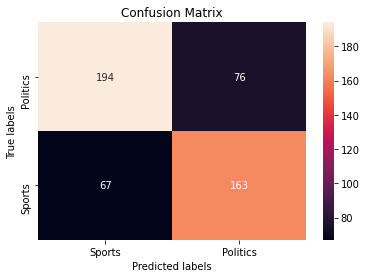

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score

import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, pred2)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Sports', 'Politics']); ax.yaxis.set_ticklabels(['Politics', 'Sports']);

In [ ]:
print("accuracy:  ",accuracy_score(y_test,pred2))

from sklearn.metrics import recall_score,precision_score

print("Recall:  ",recall_score(y_test,pred2,average='macro'))

print("Precision: ",precision_score(y_test, pred2, average='micro'))

accuracy:   0.714
Recall:   0.7136070853462158
Precision:  0.714


## Submission

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train,y) # train with all train data 

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,

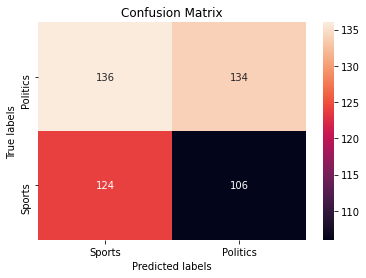

In [ ]:
cm = confusion_matrix(y_test, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Sports', 'Politics']); ax.yaxis.set_ticklabels(['Politics', 'Sports']);

In [ ]:
print("accuracy:  ",accuracy_score(y_test,pred))

from sklearn.metrics import recall_score,precision_score

print("Recall:  ",recall_score(y_test,pred,average='macro'))

print("Precision: ",precision_score(y_test, pred, average='micro'))

accuracy:   0.484
Recall:   0.4822866344605475
Precision:  0.484


In [ ]:
submit=data_test.TweetId.to_frame()

In [ ]:
def to_classes(label):
    
    if label == 0:
        return "Politics" 
    return "Sports"

In [ ]:
submit=pd.DataFrame({"Label":[to_classes(label) for label in pred]},index=submit.TweetId)

In [ ]:
submit

,Label
TweetId,
306486520121012224,Politics
286353402605228032,Politics
289531046037438464,Sports
306451661403062273,Politics
297941800658812928,Politics
...,...
306024724520108032,Politics
293520788793999361,Politics
261896983244046336,Sports


In [ ]:
submit.to_csv("submission.csv")